# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

### Import libraries & download dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim

from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
from typing import Optional

import gensim
import gensim.downloader as gloader  

import re

!pip install python-Levenshtein
import Levenshtein

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 50 kB 2.9 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149863 sha256=75b240bb84bd4ff9c218172712b270cda55a7dbd9538136473e105de92147e19
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-13 21:04:13--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.04s   

2021-12-13 21:04:13 (12.4 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



### Dataframe creation and split into train, val and test set

The way to split the dataset is already defined:  
train set : documents 1-100;  
validation set : documents 101-150;  
test set : documents 151-199;

In [3]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]


dataset = pd.concat(dfs, ignore_index=True)
dataset['word'] = dataset['word'].transform(lambda x : x.lower())  

train_set = pd.concat(dfs[:100], ignore_index=True)
train_set['word'] = train_set['word'].transform(lambda x : x.lower())

val_set = pd.concat(dfs[100:150], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

test_set = pd.concat(dfs[150:199], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

labels = dataset['label'].unique()
words = dataset['word'].unique()

In [4]:
EMBEDDING_SIZE = 50
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

[==================================================] 100.0% 66.0/66.0MB downloaded


We started splitting documents in sentences using 
punctuation labelled as '.' as end of sentences

In [ ]:
full_stops = train_set[(train_set['label']=='.')].index
max_length = max(full_stops[1:] - full_stops[:-1])

val_stops = val_set[(val_set['label']=='.')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])


OOV_train = set(train_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_val = set(val_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_test = set(test_set['word'].unique()).difference(set(embedder.vocab.keys()))

In [ ]:
print('Before pre-processing:')
print("Train set unique words:", len(train_set['word'].unique()))
print('OOV:', len(OOV_train))
print('Max sentence length', max_length)
print("\nValidation set unique words:", len(val_set['word'].unique()))
print('Max sentence length', max_length_val)
print('OOV:', len(OOV_val))
print("\nTest set unique words:", len(test_set['word'].unique()))
print('Max sentence length', max_length_test)
print('OOV:', len(OOV_test))

Then we tried to improve the sentences splitting using also the semi-column

In [5]:
full_stops = train_set[(train_set['label']=='.') | (train_set['word']==';')].index
max_length = max(full_stops[1:] - full_stops[:-1])

val_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])

In [ ]:
print('After processing')
print('Max sentence length in Train Set:', max_length)
print('Max sentence length in Validation Set:', max_length_val)
print('Max sentence length in Test Set:', max_length_test)

In [6]:
def indexOfPhrase(word_idx):
  return np.count_nonzero(word_idx > full_stops)

def val_phrases(word_idx):
  return np.count_nonzero(word_idx > val_stops)

train_grouped = train_set.groupby(by=np.vectorize(indexOfPhrase))
val_grouped = val_set.groupby(by=np.vectorize(val_phrases))

### Embedder end Encoder preparation

In [7]:
EMBEDDING_SIZE = 50
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("\nThere are", len(OOV), "OOV")

{'630.9', 'market-share', '5\\/8', 'investment-grade', 'anti-china', 'landonne', 'ariail', '372.9', '71,309', 'yoshihashi', 'school-improvement', 'computer-driven', 'ntg', '8.467', 'subskills', '11-month-old', 'college-bowl', '14.', 'radio-station', '143.80', 'lookee-loos', 'constitutional-law', 'bermuda-based', '387.8', 'pre-1933', 'triple-c', 'cash-and-stock', 'boogieman', 'co-developers', 'mehrens', 'iran\\/contra', 'corn-buying', 'state-supervised', '30,537', 'million-a-year', 'cop-killer', 'pre-1917', 'drobnick', 'cash-rich', 'cost-control', 'veselich', 'purepac', 'buttoned-down', 'money-center', 'telephone-information', '1937-40', 'free-enterprise', 'arbitraging', 'ensrud', 'senate-house', 'industry-supported', '40-megabyte', 'nekoosa', '236.79', 'polyproplene', 'anku', 'exxon-owned', 'superpremiums', 'industrial-production', 'inter-tel', 'car-care', 'unfair-trade', '319.75', 'red-blooded', 'hart-scott-rodino', 'teacher-cadet', 'bronces', 'pro-forma', 'product-design', 'program-t

In [8]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  word = word.replace(',', '')
  number = float(word)

  idx = np.argmin(np.abs(number_keys - number))
  return str_number_keys[idx]



def handling_OOV(OOV, embedder):
  '''
  Try to check if OOV are due to:
     1)Decimal numbers; 
     2)words separated by special character (-, \\/)compuound words ;
     3)Words compuound by two words present in the vocabulary; 
     4)Typos;
  '''

  '''
  Decimal numbers are encoded using the nearest integer
  '''
  print('Analyzing numbers')
  vocab_keys = embedder.vocab.keys()
  vocab_array = np.array(list(vocab_keys))
  str_number_keys = [n for n in tqdm(vocab_keys) if isNumber(n)]
  number_keys = np.array(str_number_keys, dtype=np.float32)

  '''
  Words separated by special characters are encoded using the embedding of the two words,
  the same is done with compound words
  '''
  print('Analyzing words separated by - or \\ \\/')
  for w in tqdm(OOV):
   try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

   except:
    pass
  
  # Compound words
  print('Analyzing compound words')
  for w in tqdm(OOV):
    for i in range(2, len(w)-2):
      w1 = w[:i]
      w2 = w[i:]
      if w1 in vocab_keys and w2 in vocab_keys:
        embedding = (embedder[w1] + embedder[w2]) / 2
        embedder.add([w], [embedding])
        #print("Add", w, "composed by", w1, "and", w2)
        break

  embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

  # Typos
  print('Analyzing typos')
  for w in tqdm(OOV):
   try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
    #print("Added", w, "as", new_w)
   except:
    pass

  

In [9]:
handling_OOV(OOV, embedder)

Analyzing numbers


100%|██████████| 400000/400000 [00:00<00:00, 738750.18it/s]


Analyzing words separated by - or \ \/


100%|██████████| 676/676 [00:00<00:00, 431560.05it/s]


Analyzing compound words


100%|██████████| 676/676 [00:03<00:00, 183.17it/s]


Analyzing typos


100%|██████████| 676/676 [00:00<00:00, 413738.44it/s]


In [ ]:
print('After processing')
print('There are ', len(set(OOV_train).difference(set(embedder.vocab.keys()))), ' OOV in the train set')
print('There are ', len(set(OOV_val).difference(set(embedder.vocab.keys()))), ' OOV in the val set')
print('There are ', len(set(OOV_test).difference(set(embedder.vocab.keys()))), ' OOV in the test set')

In [ ]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

vocab_keys = embedder.vocab.keys()
vocab_array = np.array(list(vocab_keys))
str_number_keys = [n for n in vocab_keys if isNumber(n)]
number_keys = np.array(str_number_keys, dtype=np.float32)

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  word = word.replace(',', '')
  number = float(word)

  idx = np.argmin(np.abs(number_keys - number))
  return str_number_keys[idx]

In [ ]:
for w in tqdm(OOV):
  try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

  except:
    pass

OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("There are", len(OOV), "OOV")


100%|██████████| 676/676 [00:50<00:00, 13.26it/s]

{'diloreto', 'colonsville', 'macmillan\\/mcgraw-hill', 'lezovich', 'nekoosa', 'subindustry', 'colorliner', 'chemplus', 'derchin', 'alurralde', 'aslacton', 'intecknings', '8300s', 'midwesco', 'phacoflex', 'muscolina', 'univest', 'continuingly', 'nipponese', 'lentjes', 'landonne', 'pramual', 'jalaalwalikraam', 'sharedata', 'trettien', 'subminimum', 'freudtoy', 'foldability', 'tarwhine', 'boogieman', 'kalipharma', '62%-owned', 'nagymaros', 'minicrash', 'yoshihashi', 'heiwado', 'macheski', 'erbamont', 'amphobiles', 'ac-130u', 'flightiness', 'disputado', 'freshbake', 'stirlen', 'jerritts', 'c.j.b.', 'intelogic', 'pennview', 'subskills', 'crocidolite', 'moleculon', 'pattenden', 'sanderoff', '29year', 'unenticing', 'severable', 'reupke', 'sept.30', 'egnuss', 'waertsilae', 'monchecourt', 'shokubai', 'quantitive', 'walbrecher', 'trockenbeerenauslesen', 'ensrud', 'twindam', 'lobsenz', 'veraldi', 'noncompetitively', 'subskill', 'rexinger', 'greenmailer', 'disputada', 'besuboru', 'purepac', 'rubin

In [ ]:
for w in OOV:
  for i in range(2, len(w)-2):
    w1 = w[:i]
    w2 = w[i:]
    if w1 in vocab_keys and w2 in vocab_keys:
      embedding = (embedder[w1] + embedder[w2]) / 2
      embedder.add([w], [embedding])
      print("Add", w, "composed by", w1, "and", w2)
      break

embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

OOV = set(words).difference(set(embedder.vocab.keys()))
print("\nThere are", len(OOV), "OOV")

Add diloreto composed by di and loreto
Add colonsville composed by colons and ville
Add lezovich composed by lezo and vich
Add nekoosa composed by neko and osa
Add subindustry composed by sub and industry
Add colorliner composed by color and liner
Add chemplus composed by chem and plus
Add derchin composed by der and chin
Add aslacton composed by asl and acton
Add 8300s composed by 83 and 00s
Add midwesco composed by mid and wesco
Add muscolina composed by mus and colina
Add univest composed by uni and vest
Add nipponese composed by nippo and nese
Add lentjes composed by lent and jes
Add landonne composed by lan and donne
Add pramual composed by pram and ual
Add sharedata composed by share and data
Add trettien composed by tr and ettien
Add subminimum composed by sub and minimum
Add freudtoy composed by freud and toy
Add foldability composed by fold and ability
Add tarwhine composed by tar and whine
Add boogieman composed by boogie and man
Add kalipharma composed by kali and pharma
Add

In [ ]:
for w in OOV:
  try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
    print("Added", w, "as", new_w)
  except:
    pass

OOV = set(words).difference(set(embedder.vocab.keys()))
print("\nThere are", len(OOV), "OOV")
print(OOV)


Added disputado as disputed
Added amphobiles as amphiboles
Added waertsilae as wartsila
Added quantitive as quantities
Added ac-130u as ac-130
Added disputada as disputed
Added alurralde as iturralde
Added reupke as remake
Added moleculon as molecular
Added continuingly as continuing

There are 8 OOV
{'jalaalwalikraam', 'macmillan\\/mcgraw-hill', 'trockenbeerenauslesen', 'besuboru', 'monchecourt', 'crocidolite', 'phacoflex', 'intecknings'}


In [23]:
OOV_value = np.random.uniform(low=-0.05, high=0.05, size=(len(OOV), EMBEDDING_SIZE))
embedder.add(list(OOV), OOV_value)

In [14]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(labels.reshape(-1, 1)) 

OrdinalEncoder(dtype=<class 'numpy.int64'>)

### Dataset analysis

In [ ]:
print("The max sentence length in training set is", max_length)
print(f'There are {len(full_stops)} sentences in the training set')
print(f'There are {len(labels)} labels')
print(f'There are {len(words)} unique words, {len(OOV)} of them are OOV')

number_OOV = len([1 for w in dataset['word'] if w in OOV])
print(f'There are {len(dataset)} words, {number_OOV} of them are OOV')

The max sentence length in training set is 67
There are 2046 sentences in the training set
There are 45 labels
There are 10947 unique words, 209 of them are OOV
There are 94084 words, 578 of them are OOV


#### Plot dataset distribution

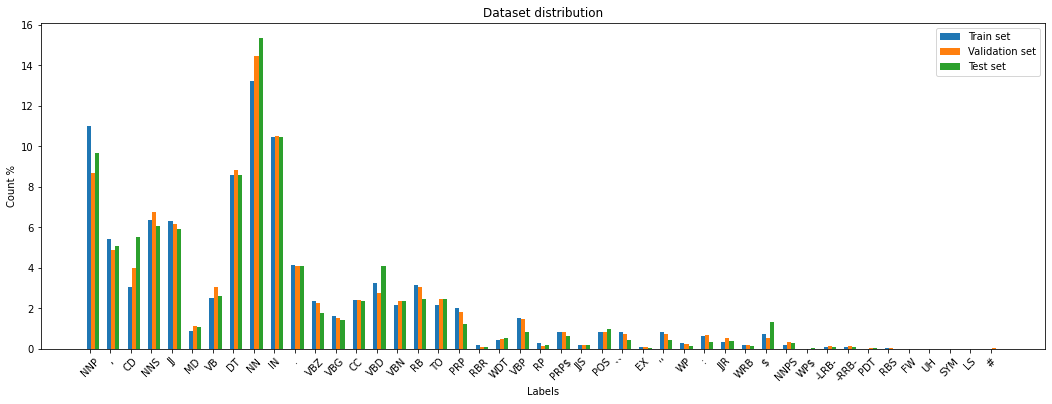

In [ ]:
train_counts = train_set.groupby(by='label').count()
train_counts = train_counts / len(train_set) * 100
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts / len(val_set) * 100
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts / len(test_set) * 100
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count %');
plt.title('Dataset distribution');

plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

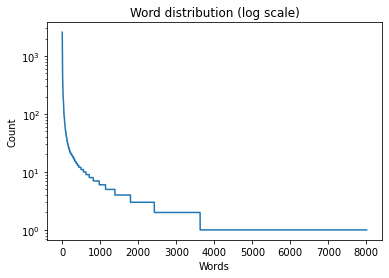

In [ ]:
counts_word = train_set.groupby('word').count().to_numpy()[:, 0]

plt.plot(np.sort(counts_word)[::-1]);
plt.yscale('log')

plt.xlabel('Words');
plt.ylabel('Count');
plt.title('Word distribution (log scale)');

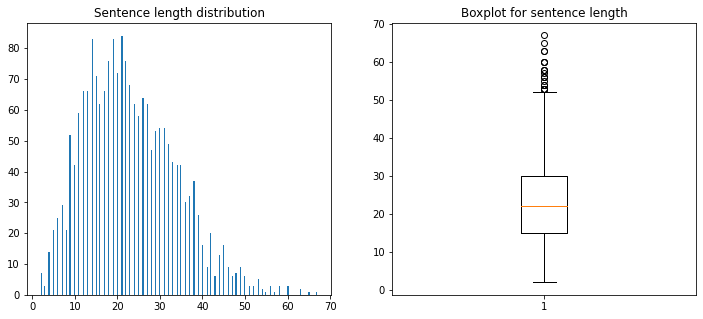

In [ ]:
f = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.hist(train_grouped.count()['word'], bins=250);
ax1.set_title("Sentence length distribution");

ax2.boxplot(train_grouped.count()['word']);
ax2.set_title("Boxplot for sentence length");

### Create RNN, Optimizer and DataLoader classes


In [10]:
class RNN(nn.Module):
  """
    architecture: str
      'LSTM'   : the baseline architecture
      '2-LSTM' : 2 LSTM layers
      '2-FC'   : 2 Dense Layers
      'GRU'    : Gated Recurrent Unit
  """
  def __init__(self, architecture, input_dim, hidden_size, output_size, device):
    super(RNN, self).__init__()
    self.architecture = architecture
    self.n_layers = 2 if architecture == '2-LSTM' else 1
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device

    
    if self.architecture == 'GRU':
      self.rnn = nn.GRU(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True)
    else:
      self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True)

    if self.architecture == '2-FC':
      self.fc = nn.Sequential(
          nn.Linear(self.hidden_size*2, self.hidden_size),
          nn.Linear(self.hidden_size, output_size)
      )
    else:
      self.fc = nn.Linear(self.hidden_size*2, output_size)



  def forward(self, input):
    input = input.permute(1, 0, 2)

    #initialize hidden state and cell state
    hidden = (torch.randn(self.n_layers*2, input.shape[1],
                          self.hidden_size).to(self.device),
              torch.randn(self.n_layers*2, input.shape[1],
                          self.hidden_size).to(self.device))
    out, hidden = self.rnn(input, hidden)

    #process timesteps independently 
    logits = self.fc(out.view(-1, out.size(2)))
    
    output = logits.view(input.shape[0], input.shape[1], self.output_size)

    return output.permute(1, 0, 2).contiguous()


  def prediction(self, input: DataLoader):
    
    self.eval()
    with torch.no_grad():

      y_pred = torch.Tensor().to(self.device)
      for data in input:  
        words = data['words'].float().to(device)
        lengths = data['lengths'].to(device)
        scores = self(words)
        classes_predicted = torch.argmax(scores, 2)

        for i, length in enumerate(lengths):
          y_pred = torch.cat((y_pred, classes_predicted[i, :length]), 0)
    
    self.train()
    return y_pred


  def accuracy(self, input: DataLoader):
    num_correct = 0
    num_samples = 0
    self.eval()
    
    with torch.no_grad():
        for data in input:
            word = data['words'].float().to(device)
            labels = data['labels'].to(device)
            labels = labels.squeeze(-1)
            
            lengths = data['lengths'].to(device)

            scores = self(word)
            classes_predicted = torch.argmax(scores, 2)

            for i, length in enumerate(lengths):
              num_correct += torch.eq(classes_predicted[i, :length], labels[i, :length]).sum().item()

            num_samples += lengths.sum()
        
    
    return num_correct/num_samples



In [11]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.history = []
    
    def train_step(self, x, y):
        self.model.train()
        yhat = self.model(x)

        yhat = yhat.reshape(-1, yhat.shape[-1])
        y = y.flatten()

        loss = self.loss_fn(yhat, y)
        self.history.append(loss.item())
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.item()

In [204]:
class MyDataset(Dataset):
  '''
  Togliere i commenti per far funzionare
  Lasciarli per provare a risolvere 

  '''
  def __init__(self, dataframe, embedder, encoder, sentence_length=None):
    self.sentence_length = sentence_length if sentence_length else dataframe.count().max()['word']
    self.dataframe = dataframe
    self.embedder = embedder
    self.encoder = encoder

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    sentence = self.dataframe.get_group(idx)[:self.sentence_length]

    labels = np.array(sentence['label'], dtype = str).reshape(-1, 1)
    encoded_labels = self.encoder.transform(labels)
    encoded_words = self.embedder[sentence['word']]

    pad_amount = self.sentence_length - len(sentence)
    encoded_labels = np.pad(encoded_labels, pad_width=((0, pad_amount), (0,0)), constant_values=-1)
    encoded_words = np.pad(encoded_words, pad_width=((0, pad_amount), (0, 0)))

    return {'words': encoded_words, 'labels': encoded_labels, 'lengths': len(sentence)}

### Training

In [115]:
from torch.nn.utils.rnn import pad_sequence

In [199]:
dataset = MyDataset(train_grouped, embedder, encoder)

In [200]:
def collate_fn_pad(batch):
    # print(batch)
    batch_dict = []
    max_length = torch.max(torch.Tensor([sample['lengths'] for sample in batch ]))
    padded_words = pad_sequence([sample['words'] for sample in batch])
    padded_labels = pad_sequence([sample['labels'] for sample in batch])

    return padded_words, padded_labels


In [201]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)#, collate_fn=collate_fn_pad)
model = RNN('LSTM', EMBEDDING_SIZE, 512, len(labels), device)
model.to(device)

loss = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.Adam(model.parameters())

optimization = Optimization(model, loss, optimizer)

In [194]:
validation = MyDataset(val_grouped, embedder, encoder)
val_loader = DataLoader(validation, batch_size=len(validation), num_workers=1)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir="logs"

In [202]:
PATH = 'model.pkl'
training_loop(model, dataloader, val_loader, 2, optimization, PATH, False)#, writer)

Epoch 1


  0%|          | 2/512 [00:00<00:32, 15.85it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  1%|          | 6/512 [00:00<00:27, 18.33it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  2%|▏         | 12/512 [00:00<00:23, 21.48it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  4%|▎         | 18/512 [00:00<00:21, 23.47it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  5%|▍         | 24/512 [00:01<00:20, 24.22it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  6%|▌         | 30/512 [00:01<00:19, 24.77it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  7%|▋         | 36/512 [00:01<00:18, 25.39it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  8%|▊         | 42/512 [00:01<00:18, 25.43it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


  9%|▉         | 48/512 [00:02<00:18, 25.56it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 11%|█         | 54/512 [00:02<00:17, 25.65it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 12%|█▏        | 60/512 [00:02<00:17, 25.44it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 13%|█▎        | 66/512 [00:02<00:17, 25.04it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 13%|█▎        | 69/512 [00:02<00:17, 25.03it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 15%|█▍        | 75/512 [00:03<00:17, 25.38it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 16%|█▌        | 81/512 [00:03<00:16, 25.39it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 17%|█▋        | 87/512 [00:03<00:16, 25.24it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 18%|█▊        | 93/512 [00:03<00:16, 25.14it/s]

torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


 19%|█▉        | 97/512 [00:03<00:17, 24.39it/s]


torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])
torch.Size([4, 67, 50])
torch.Size([4, 67, 1])


KeyboardInterrupt: ignored

In [203]:
def training_loop(model: nn.Module, 
                  train_set: torch.utils.data.DataLoader,
                  val_set: torch.utils.data.DataLoader,
                  n_epochs: int,
                  optimization: Optimization,
                  save_path: str,
                  load_model: bool,
                  load_path: Optional[str] = None,
                  writer: Optional[SummaryWriter] = None):
  
  if load_model:
    model.load_state_dict(torch.loda(load_path))

  model.to(device)
  train_acc = np.zeros(n_epochs)
  val_acc = np.zeros(n_epochs)
  best_acc = 0

  for epoch in range(n_epochs):
    print(f'Epoch {epoch+1}')

    for data in tqdm(dataloader):
      w = data['words'].float().to(device)
      l = data['labels'].to(device)
      #w, l = data
      #print(w, l)
      #w.to(device)
      #l.to(device)
      optimization.train_step(w, l)
      
    print(f'loss:{optimization.history[epoch] : .3f}')
    train_acc[epoch] = model.accuracy(dataloader)
    print(f'train acc:{train_acc[epoch]}')
    val_acc[epoch] = model.accuracy(val_loader)
    print(f'val acc:{val_acc[epoch]}')

    #writer.add_scalars('Loss', {"Train": optimization.history[epoch]}, epoch)
    #writer.add_scalars('Train Acc', {"Train": val_acc[epoch]}, epoch)
    #writer.add_scalars('Val Acc', {"Train": val_acc[epoch]}, epoch)
    #writer.flush()

    if val_acc[epoch] > best_acc:
      torch.save(model.state_dict(), save_path)
      best_acc = val_acc[epoch]
      print(f'Model saved at {save_path}')
      
  #writer.close()
  print(f'\n Best model at epoch {np.argmax(val_acc) + 1}')

In [ ]:
def tuning_loop(  model: nn.Module,
                  train_loader: torch.utils.data.DataLoader,
                  val_loader: torch.utils.data.DataLoader,
                  n_epochs: int,
                  save_path: str,
                  search: dict, 
                  load_path: Optional[str] = None):
                  #writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  combination = 3
  for n in range(combination):
    print('='*15)
    print('New setting')

    lr = np.random.choice(search['lr'])
    print('lr :', lr)
    b1 = np.random.choice(search['beta1'])
    print('beta1 :', b1)
    b2 = np.random.choice(search['beta2'])
    print('beta2 :', b2)
    eps = np.random.choice(search['eps'])
    print('eps :', eps)
    weight_decay = np.random.choice(search['weight_decay'])
    print('weight_decay :', weight_decay)

    optimizer = optim.Adam(model.parameters(), lr=lr, betas=(b1, b2), eps=eps, weight_decay=weight_decay)
    optimization = Optimization(model, loss, optimizer)


    #if load_path:
    #    model.load_state_dict(torch.load(load_path))

    train_acc = np.zeros(n_epochs)
    val_acc = np.zeros(n_epochs)
    best_acc = 0
    model.to(device)

    for epoch in range(n_epochs):

        print(f'Epoch {epoch+1}')

        for data in tqdm(train_loader):
            w = data['words'].float().to(device)
            l = data['labels'].to(device)
            optimization.train_step(w, l)

        print(f'loss:{optimization.history[epoch] : .3f}')
        train_acc[epoch] = model.accuracy(train_loader)
        print(f'train acc:{train_acc[epoch]}')
        val_acc[epoch] = model.accuracy(val_loader)
        print(f'val acc:{val_acc[epoch]}')

        #if writer:
        #    writer.add_scalars('Loss', {"Train": optimization.history[epoch]}, epoch)
        #    writer.add_scalars('Train Acc', {"Train": val_acc[epoch]}, epoch)
        #    writer.add_scalars('Val Acc', {"Train": val_acc[epoch]}, epoch)
        #    writer.flush()

        if val_acc[epoch] > best_model_acc:
            torch.save(model.state_dict(), save_path)
            best_acc = val_acc[epoch]
            print(f'Model saved at {save_path}')
            config = {'lr': lr,
                      'beta1': b1,
                      'beta2': b2, 
                      'eps': eps,
                      'weight_decay': weight_decay}

    #if writer:
    #    writer.close()
  print(f'\n Best model config : {config}')

In [ ]:
search = {'lr': [0.001, 0.01, 0.1],
          'b1': [0.8, 0.9, 0.99],
          'b2': [0.9, 0.95, 0.99],
          'eps': [1e-7, 1e-8, 1e-9],
          'weight_decay': [0, 0.05, 0.1]}


In [ ]:
tuning_loop(model, dataloader, val_loader, 2, PATH, search)

New setting
lr : 0.0285462223235679
beta1 : 0.9365026267096401
beta2 : 0.9841779740098606
eps : 4.101763776438515e-09
weight_decay : 0.014872350786418366
Epoch 1


100%|██████████| 512/512 [00:26<00:00, 19.61it/s]


loss: 8.176


KeyboardInterrupt: ignored

### Confusion Matrix and Report


In [ ]:
correct_labels = np.array(val_set['label'],  dtype = str).reshape(-1, 1)
y_true_encoded = torch.Tensor(encoder.fit_transform(correct_labels))

y_pred = model.prediction(val_loader)

TypeError: ignored

In [ ]:
print(labels)
print(y_true_encoded)

['NNP' ',' 'CD' 'NNS' 'JJ' 'MD' 'VB' 'DT' 'NN' 'IN' '.' 'VBZ' 'VBG' 'CC'
 'VBD' 'VBN' 'RB' 'TO' 'PRP' 'RBR' 'WDT' 'VBP' 'RP' 'PRP$' 'JJS' 'POS'
 '``' 'EX' "''" 'WP' ':' 'JJR' 'WRB' '$' 'NNPS' 'WP$' '-LRB-' '-RRB-'
 'PDT' 'RBS' 'FW' 'UH' 'SYM' 'LS' '#']
tensor([[10.],
        [20.],
        [19.],
        ...,
        [27.],
        [36.],
        [ 6.]])


In [ ]:
print(type(y_pred))
print(type(y_true_encoded))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
punctuation = [',', '.', '``', "''",  ':' ]
no_punc_labels = labels[]
print(classification_report(y_true_encoded.cpu(), y_pred.cpu(), target_names=labels[:44]))

              precision    recall  f1-score   support

         NNP       0.00      0.00      0.00        15
           ,       0.00      0.00      0.00       173
          CD       0.00      0.00      0.00       225
         NNS       0.00      0.00      0.00      1528
          JJ       0.00      0.00      0.00        50
          MD       0.00      0.00      0.00        53
          VB       0.00      0.00      0.00      1277
          DT       0.00      0.00      0.00       214
          NN       0.00      0.00      0.00       758
          IN       0.00      0.00      0.00      1249
           .       0.00      0.00      0.00      2754
         VBZ       0.00      0.00      0.00        34
         VBG       0.00      0.00      0.00         2
          CC       0.12      0.01      0.01      3275
         VBD       0.00      0.00      0.00      1924
         VBN       0.00      0.00      0.00       165
          RB       0.00      0.00      0.00        58
          TO       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


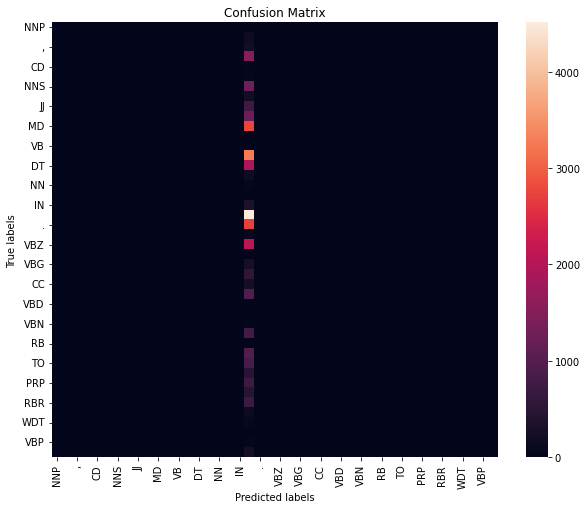

In [ ]:
cm = confusion_matrix(y_true_encoded.cpu(), y_pred.cpu())

plt.rcParams["figure.figsize"] = (10, 8)
ax= plt.subplot()
sns.heatmap(cm)

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels.flatten()); 
plt.xticks(rotation=90);
ax.yaxis.set_ticklabels(labels.flatten());
plt.yticks(rotation=0);